In [1]:
import pandas as pd
import numpy as np

import os
import seaborn as sns
import matplotlib.pyplot as plt

# 6.1

In [2]:
run_once = False
cap_folder_names = ['large_cap', 'med_cap', 'small_cap']
for i in cap_folder_names:
    directory = os.path.join("c:\\",f"Users\VR94\Desktop\Python Files\Intership - aspiration.ai\module_6\\{i}")
    for root,dirs,files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                df = pd.read_csv(f"{i}\\" + file).filter(['Date', 'Close Price'])
                df['Date'] = pd.to_datetime(df['Date'])
                df = df.set_index('Date')
                stock_name = file.split('.')[0]
                df.rename(columns = {'Close Price':stock_name}, inplace = True)
                if run_once == False:
                    df_merge = df
                    run_once = True
                else:
                    df_merge = df_merge.merge(df, left_index=True, right_index=True)
                    
                #print(df_merge.shape) #display change of shape in each iteration

In [3]:
df_merge.head()

,ADANIPORTS,BAJFINANCE,CIPLA,HDFC,HEROMOTOCO,HINDALCO,INFRATEL,ITC,RELIANCE,TCS,...,ASHOKA,CENTURYPLY,GUJALKALI,IRCON,JKLAKSHMI,LALPATHLAB,LEMONTREE,NCC,SONATSOFTW,VIPIND
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-28,328.90,2168.00,654.05,1754.50,2933.25,233.00,262.95,297.75,1257.95,2183.70,...,104.35,180.55,596.65,415.3,304.30,958.55,72.6,73.00,369.55,413.60
2018-09-28,328.90,2168.00,654.05,1754.50,2933.25,229.65,262.95,297.75,1257.95,2183.70,...,104.35,180.55,596.65,415.3,304.30,958.55,72.6,73.00,369.55,413.60
2018-10-01,330.35,2208.50,654.15,1806.35,2973.00,242.90,267.60,297.10,1231.70,2255.55,...,106.60,176.20,600.05,427.0,298.35,941.75,70.6,72.10,359.50,400.45
2018-10-03,329.75,2232.20,654.55,1797.55,2913.50,253.75,251.70,295.20,1205.10,2162.85,...,110.85,178.10,608.05,421.4,298.40,958.55,69.9,74.85,353.85,414.45
2018-10-04,317.05,2179.15,638.40,1778.45,2763.50,251.85,256.15,287.10,1122.25,2064.80,...,107.00,172.75,594.70,407.1,297.50,926.65,69.7,75.05,329.80,407.75


# 6.2

#### Calculating Returns and Volatility of all stocks

In [4]:
dictionary = {'Stock Name': [],
              'Volatility': [],
              'Returns': []}
cap_folder_names = ['large_cap', 'med_cap', 'small_cap']
for i in cap_folder_names:
    directory = os.path.join("c:\\",f"Users\VR94\Desktop\Python Files\Intership - aspiration.ai\module_6\\{i}")
    for root,dirs,files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                df = pd.read_csv(f"{i}\\" + file).filter(['Date', 'Close Price'])
                df['Date'] = pd.to_datetime(df['Date'])
                df = df.set_index('Date')
                stock_name = file.split('.')[0]
                df.rename(columns = {'Close Price':stock_name}, inplace = True)
                
                perc_change = pd.DataFrame(df[stock_name].pct_change().values)
                stock_volatility = perc_change.std()
                stock_return = perc_change.mean()
                
                dictionary['Stock Name'].append(stock_name)
                dictionary['Volatility'].append(stock_volatility[0])
                dictionary['Returns'].append(stock_return[0])

#### Calculating the same from 'df_merge' dataset (run any one cell)

In [5]:
dictionary = {'Stock Name': [],
              'Volatility': [],
              'Returns': []}
for stock_name in df_merge.columns:
    perc_change = pd.DataFrame(df_merge[stock_name].pct_change().values)
    stock_volatility = perc_change.std()
    stock_return = perc_change.mean()
    dictionary['Stock Name'].append(stock_name)
    dictionary['Volatility'].append(stock_volatility[0])
    dictionary['Returns'].append(stock_return[0])

#### Display Volatility and Returns corresponding to each stock

In [6]:
df_vlty_rtns = pd.DataFrame(dictionary)
df_vlty_rtns

,Stock Name,Volatility,Returns
0,ADANIPORTS,0.021401,0.000765
1,BAJFINANCE,0.019863,0.001751
2,CIPLA,0.013756,-0.000829
3,HDFC,0.013380,0.000641
4,HEROMOTOCO,0.016860,-0.000661
5,HINDALCO,0.018971,-0.000812
6,INFRATEL,0.018933,0.000229
7,ITC,0.010914,-0.000089
8,RELIANCE,0.017339,0.000043
9,TCS,0.016594,0.000006


# 6.3

In [7]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [8]:
#Creating data for model fitting
x2 = df_vlty_rtns['Volatility'].values
x1 = df_vlty_rtns['Returns'].values
stock_labels = df_vlty_rtns['Stock Name'].values
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 

Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

Inertia: It is the sum of squared distances of samples to their closest cluster center.

In [9]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

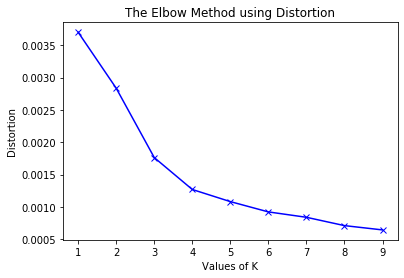

In [10]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

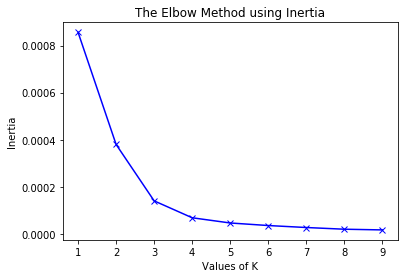

In [11]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.

Here, from the graph we choose k = 4

# 6.4

In [24]:
k = 2
kmeanModel = KMeans(n_clusters=k) 
kmeanModel.fit(X)  

pred_clusters = kmeanModel.predict(X)

In [25]:
cluster_labels = []
for i in pred_clusters:
    label = 'Cluster ' + str(i+1)
    cluster_labels.append(label)

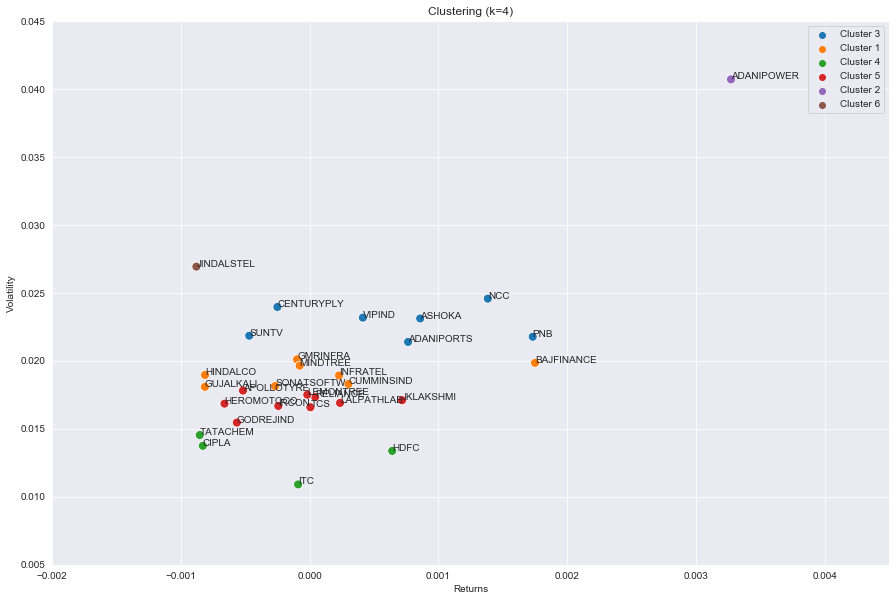

In [26]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=x1, y=x2, hue=cluster_labels, s=80, alpha=1)
plt.legend()
plt.xlim(-0.002,0.0045)
plt.ylim(0.005,0.045)
plt.xlabel("Returns")
plt.ylabel("Volatility")
plt.title("Clustering (k=4)")
for index,label in enumerate(stock_labels):
    ax.annotate(label, (x1[index], x2[index]))
plt.show()